<a href="https://colab.research.google.com/github/leslie-zi-pan/kaggle-courses/blob/main/data_visualisation/Data_Visualisation_Line_Charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualisation - Line Chart


# Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Kaggle data setup

### Authorise with kaggle json api key

In [2]:
! pip install kaggle
! rm -rf ~/.kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

### Download kaggle dataset

In [3]:
!kaggle datasets download -d alexisbcook/data-for-datavis
!unzip data-for-datavis

  0% 0.00/142k [00:00<?, ?B/s]
100% 142k/142k [00:00<00:00, 58.3MB/s]
Archive:  data-for-datavis.zip
  inflating: cancer.csv              
  inflating: cancer_b.csv            
  inflating: cancer_m.csv            
  inflating: candy.csv               
  inflating: fifa.csv                
  inflating: flight_delays.csv       
  inflating: ign_scores.csv          
  inflating: insurance.csv           
  inflating: iris.csv                
  inflating: iris_setosa.csv         
  inflating: iris_versicolor.csv     
  inflating: iris_virginica.csv      
  inflating: museum_visitors.csv     
  inflating: spotify.csv             


## Imports

In [4]:
import pandas as pd
# Add custom registry converters
pd.plotting.register_matplotlib_converters()

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Setup Complete')

Setup Complete


## Load the data

In [7]:
# Path of the file to read
spotify_filepath = 'spotify.csv'

# Read the file into a variable fifa_data
spotify_data = pd.read_csv(spotify_filepath, index_col='Date', parse_dates=True)

## Examine data

In [8]:
spotify_data.head(10)

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2017-01-06,12287078,NaN,NaN,NaN,NaN
2017-01-07,13190270,NaN,NaN,NaN,NaN
2017-01-08,13099919,NaN,NaN,NaN,NaN
2017-01-09,14506351,NaN,NaN,NaN,NaN
2017-01-10,14275628,NaN,NaN,NaN,NaN
2017-01-11,14372699,NaN,NaN,NaN,NaN
2017-01-12,14148108,NaN,NaN,NaN,NaN
2017-01-13,14536236,275178.0,NaN,NaN,NaN
2017-01-14,14173311,1144886.0,NaN,NaN,NaN


In [9]:
# Print last rows using tail() function
spotify_data.tail(10)

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2017-12-31,7073032,8203454.0,3514602.0,2787752.0,3792953.0
2018-01-01,4865387,5557165.0,2179506.0,2368321.0,2537274.0
2018-01-02,4541816,3980200.0,2368870.0,2505241.0,2683769.0
2018-01-03,4596993,3890385.0,2363422.0,2587620.0,2753557.0
2018-01-04,4447076,3512667.0,2345804.0,2575748.0,2710101.0
2018-01-05,4492978,3450315.0,2408365.0,2685857.0,2869783.0
2018-01-06,4416476,3394284.0,2188035.0,2559044.0,2743748.0
2018-01-07,4009104,3020789.0,1908129.0,2350985.0,2441045.0
2018-01-08,4135505,2755266.0,2023251.0,2523265.0,2622693.0


## Plot the data


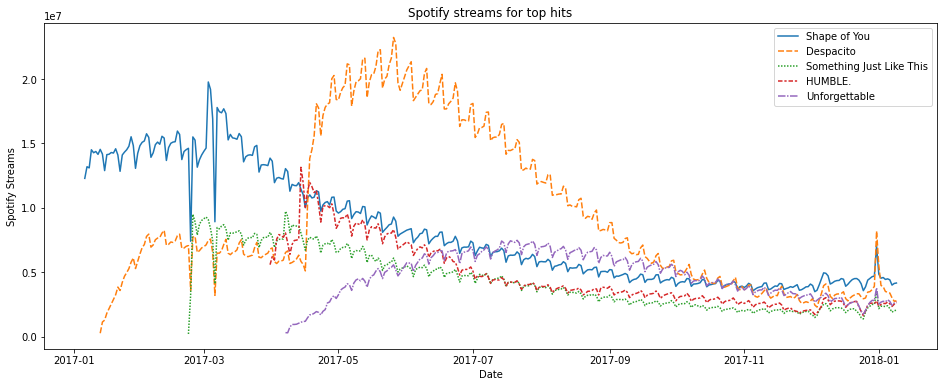

In [12]:
# Set the width and height of the figure
plt.figure(figsize=(16, 6))

# Line chart showing how FIFA rankings evolved over time
plt.title('Spotify streams for top hits')
plt.ylabel('Spotify Streams')
sns.lineplot(data=spotify_data)

sns.lineplot creates a line chart using the seaborn package. 

data = spotify_data selects the spotify_data used to create the chart

## Plot subset of the data

We can also plot subset of data depending on our desired data output. 

Lets pot a subset by excluding songs we don't want

In [16]:
songs_to_exclude = [
                    'Something Just Like This', 
                    'HUMBLE.',
                    ]

all_songs = list(spotify_data.columns)
target_songs = [song for song in all_songs if song not in songs_to_exclude]
target_songs

['Shape of You', 'Despacito', 'Unforgettable']

Text(0.5, 0, 'Date')

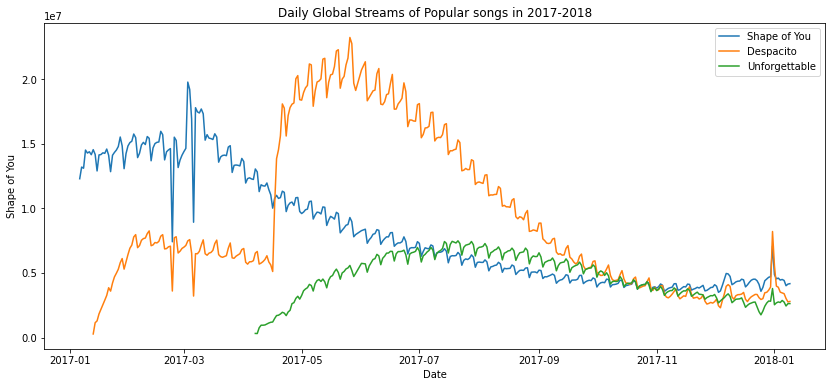

In [18]:
# Set the width and height of the figure
plt.figure(figsize=(14, 6))

# Add title
plt.title('Daily Global Streams of Popular songs in 2017-2018')

for song in target_songs:
  sns.lineplot(data=spotify_data[song], label=song)

# Add label for horizontal axis
plt.xlabel("Date")